# Einfluss der Level-0 und Level-1 Modellauswahl auf die Vorhersagegenauigkeit von Stacking-Modellen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plotlib
%matplotlib inline
import sklearn
import re

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC,PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score;
from sklearn.metrics import make_scorer;
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_friedman1, make_friedman3
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler  

In [2]:
plt.style.use('ggplot')

plt.rcParams.update({'savefig.dpi': 75})
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams.update({'axes.labelsize': 18})
plt.rcParams.update({'axes.titlesize': 30})
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth': 2.0})
plt.rcParams.update({'lines.markersize': 8})
plt.rcParams.update({'legend.fontsize': 14})
plt.rcParams.update({'text.usetex': True})

plt.rcParams['font.serif'] = "cm"
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


In [3]:
RANDOM_STATE=20132
np.random.seed(RANDOM_STATE)

In [4]:
%run models/stacking_model.ipynb

In [5]:
%run functions/functions.ipynb

In [6]:
%run visualisation/visualisation_functions.ipynb

Negativen RMSE hinzufügen.

In [7]:
def score_rmse(y, y_pred, **kwargs):
    return np.sqrt(mean_squared_error(y, y_pred))

neg_rmse_score = make_scorer(score_rmse,greater_is_better=False)

scores = {"r2":'r2', "neg-rmse": neg_rmse_score}

# Stacking-Modelle mit unterschiedlicher Level-0 Modellauswahl

In [10]:
linearReg = LinearRegression()
randomForrest = RandomForestRegressor(n_estimators=10)
kNeighbors = KNeighborsRegressor(n_neighbors=5)
lasso = Lasso()

two_newline= r'\newline'*2
stacking_model_list =np.array( [
    
    (StackingModels(base_models=[linearReg,randomForrest,kNeighbors,lasso],
                    meta_model=linearReg,
                    n_folds=5),
     
     f'''\\raggedleft Id:0 {two_newline} 
     level 0: Lineare Regression, RandomForrest, K Neighbors, Lasso {two_newline} 
     level 1: Lineare Regression'''),
    
    
    (StackingModels(base_models=[linearReg,randomForrest,kNeighbors],
                    meta_model=linearReg,
                    n_folds=5),
     
     f'''\\raggedleft Id:1 {two_newline} 
     level 0: Lineare Regression, RandomForrest, K Neighbors {two_newline} 
     level 1: Lineare Regression'''),
    
    (StackingModels(base_models=[linearReg,kNeighbors],
                    meta_model=linearReg,
                    n_folds=5),
     
     f'''\\raggedleft Id:2 {two_newline}
     level 0: Lineare Regression, K Neighbors {two_newline}
     level 1: Lineare Regression'''),  
    
    (StackingModels(base_models=[linearReg,randomForrest],
                    meta_model=linearReg,
                    n_folds=5),
     
     f'''\\raggedleft Id:3 {two_newline} 
     level 0: Lineare Regression, RandomForrest {two_newline}
     level 1: Lineare Regression'''),
    
    
    (StackingModels(base_models=[lasso,randomForrest],
                    meta_model=linearReg,
                    n_folds=5),
     
     f'''\\raggedleft Id:4 {two_newline}
     level 0: Lasso, RandomForrest {two_newline}
     level 1: Lineare Regression'''), 
    
    (StackingModels(base_models=[kNeighbors,randomForrest],
                    meta_model=linearReg,
                    n_folds=5),
     
     f'''\\raggedleft Id:5 {two_newline}
     level 0: K Neighbors, RandomForrest {two_newline}
     level 1: Lineare Regression'''),
])

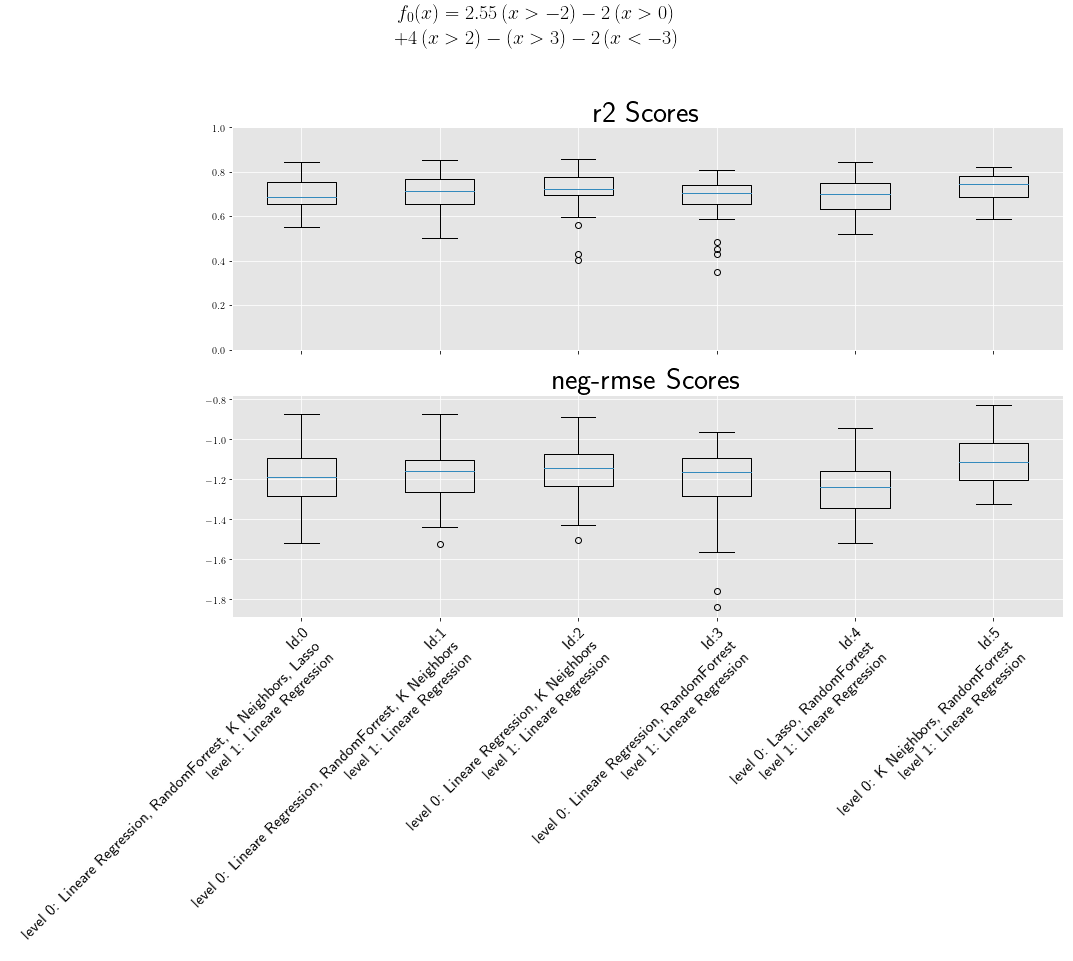

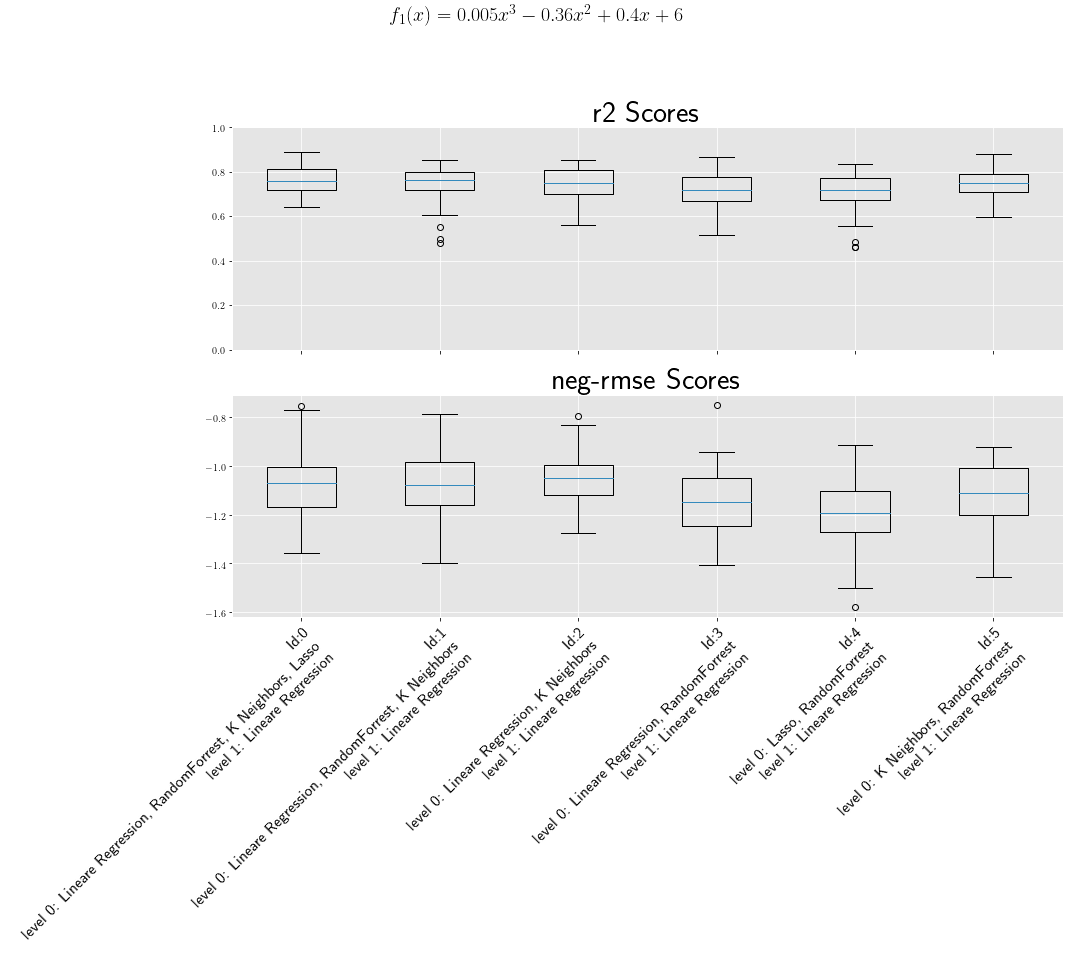

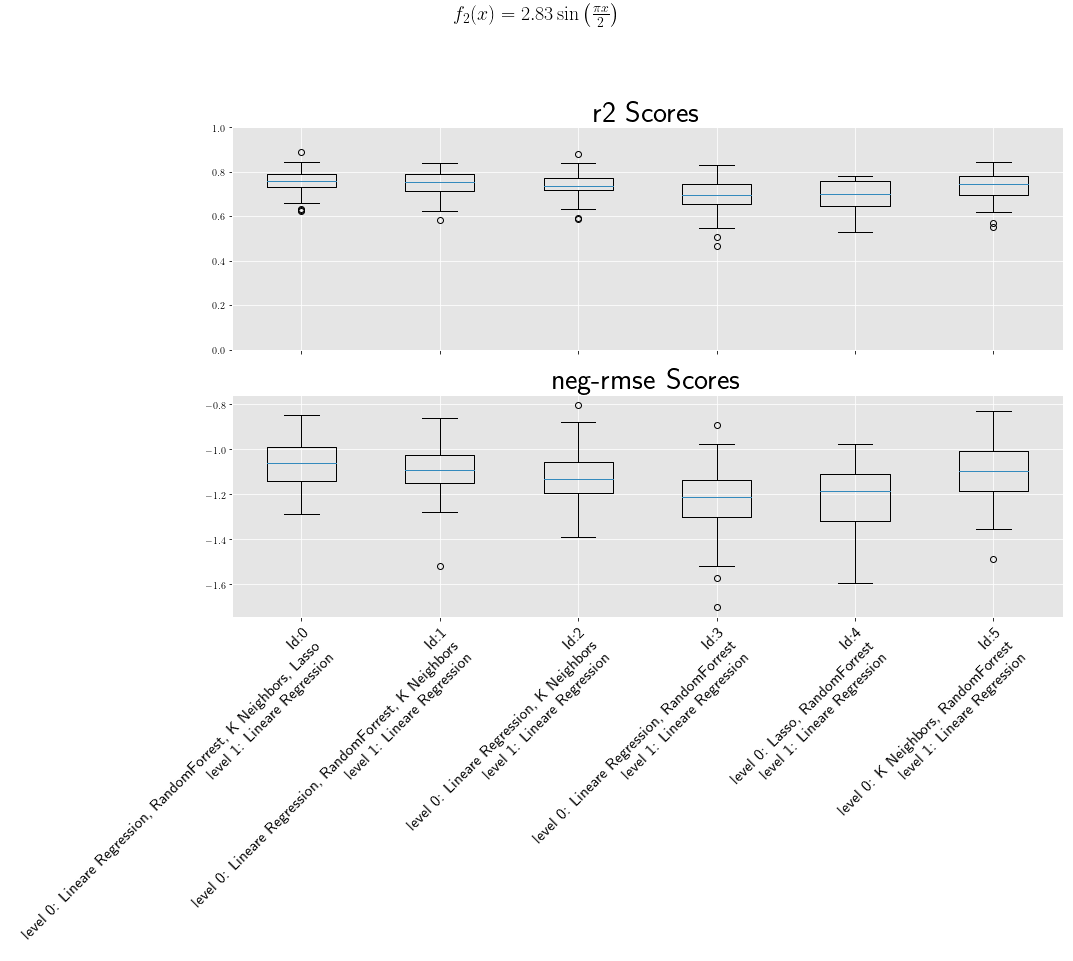

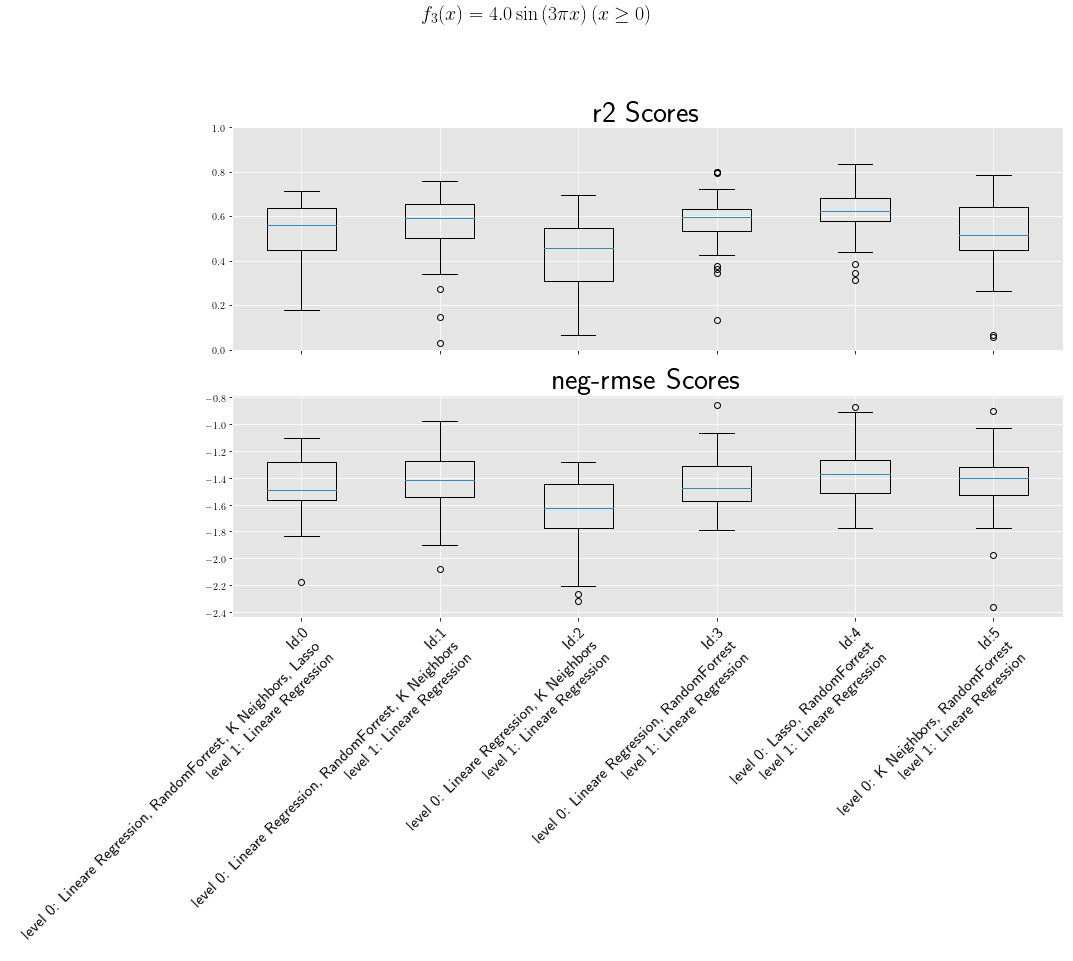

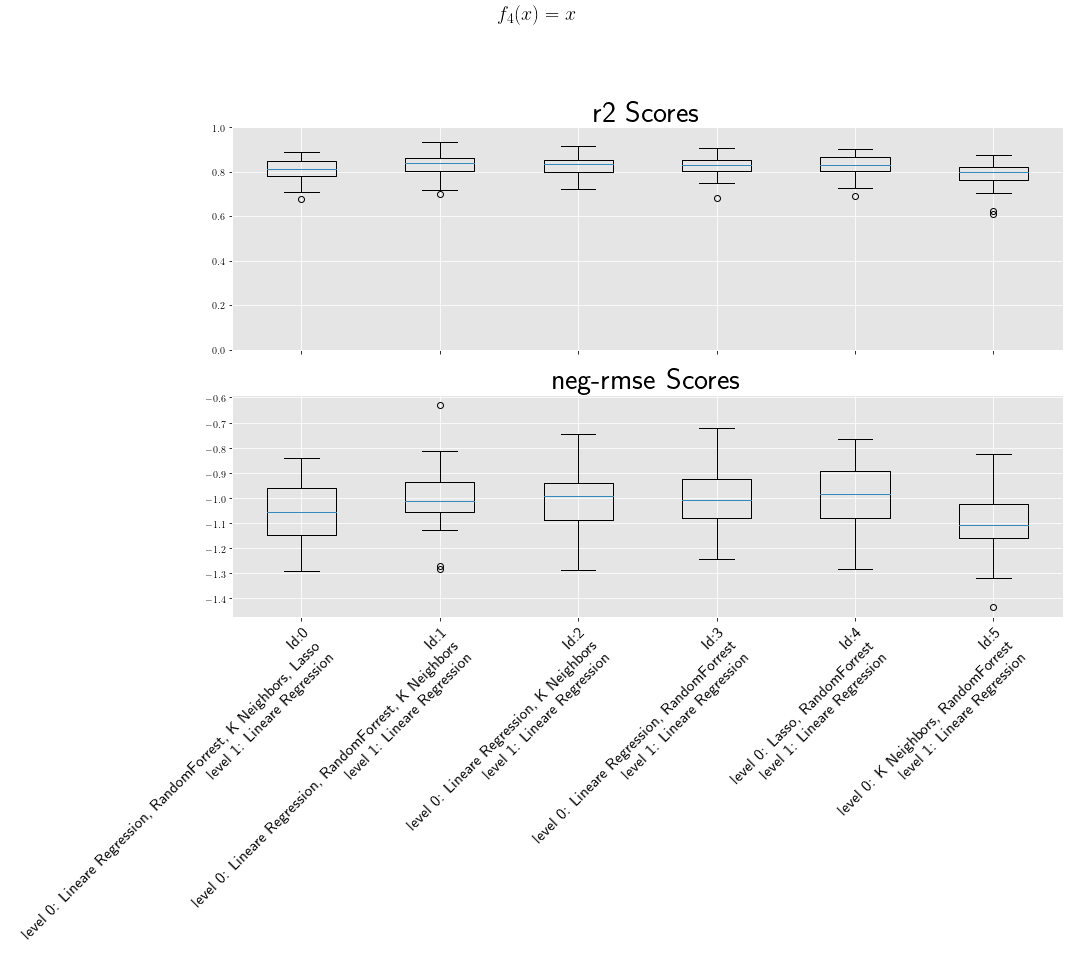

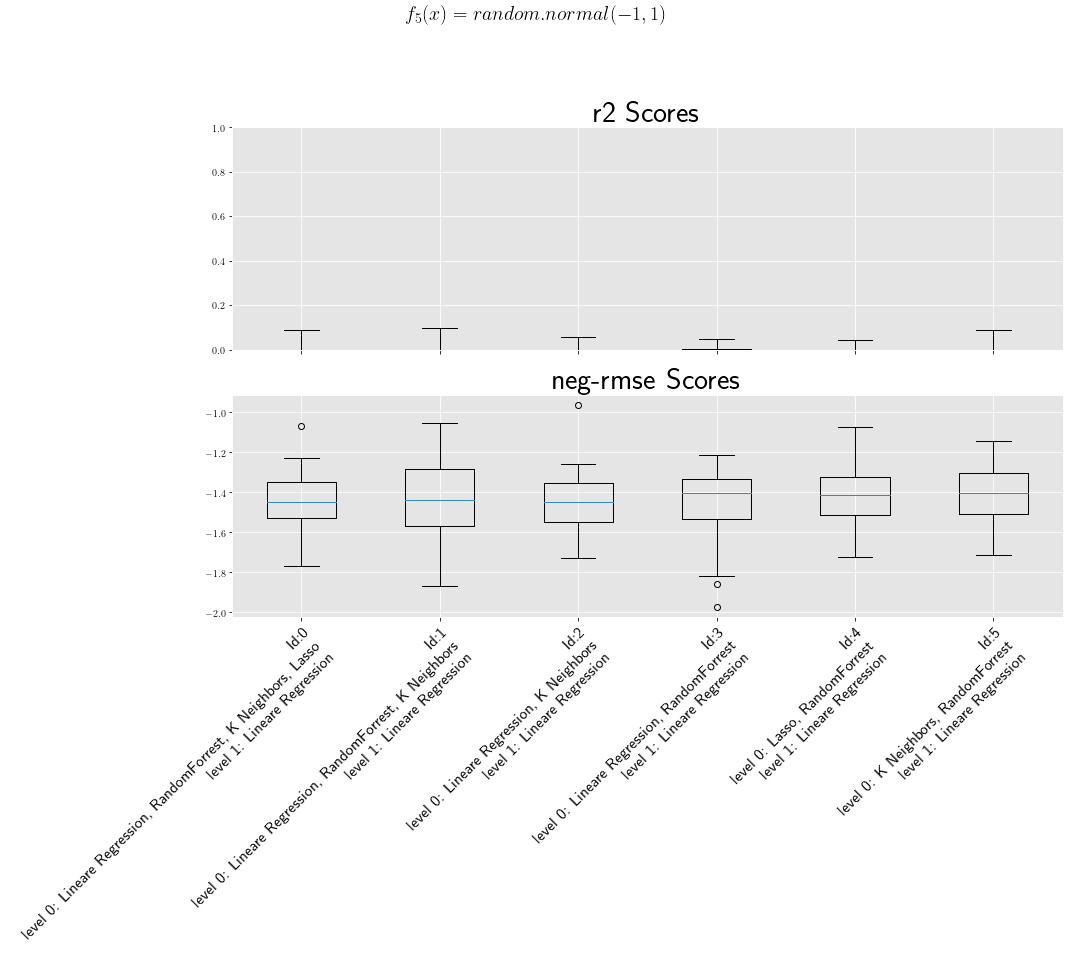

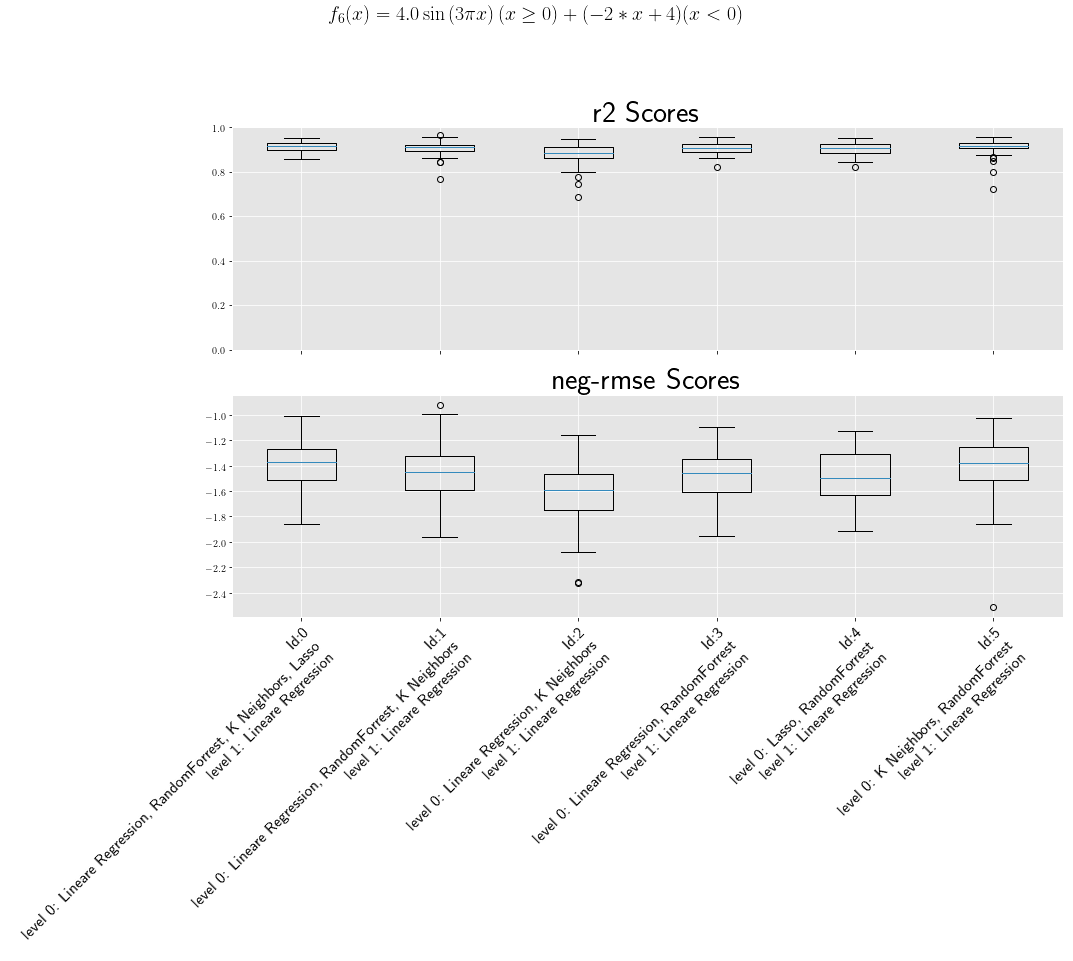

r2 [[ 0.69836685  0.75919662  0.75508536  0.51850523  0.81360697 -0.0998606
   0.91287941]
 [ 0.70246099  0.74320215  0.74540611  0.55495508  0.83003658 -0.07299181
   0.90639752]
 [ 0.7160585   0.74563912  0.74026012  0.40118771  0.82558465 -0.0831949
   0.87622828]
 [ 0.68776476  0.71355779  0.68979151  0.5686091   0.82819908 -0.07291386
   0.90482014]
 [ 0.68531367  0.7038507   0.69002591  0.61701431  0.82885437 -0.06875935
   0.90398974]
 [ 0.73336526  0.74675437  0.73591033  0.5198322   0.79015878 -0.04592571
   0.91130491]]


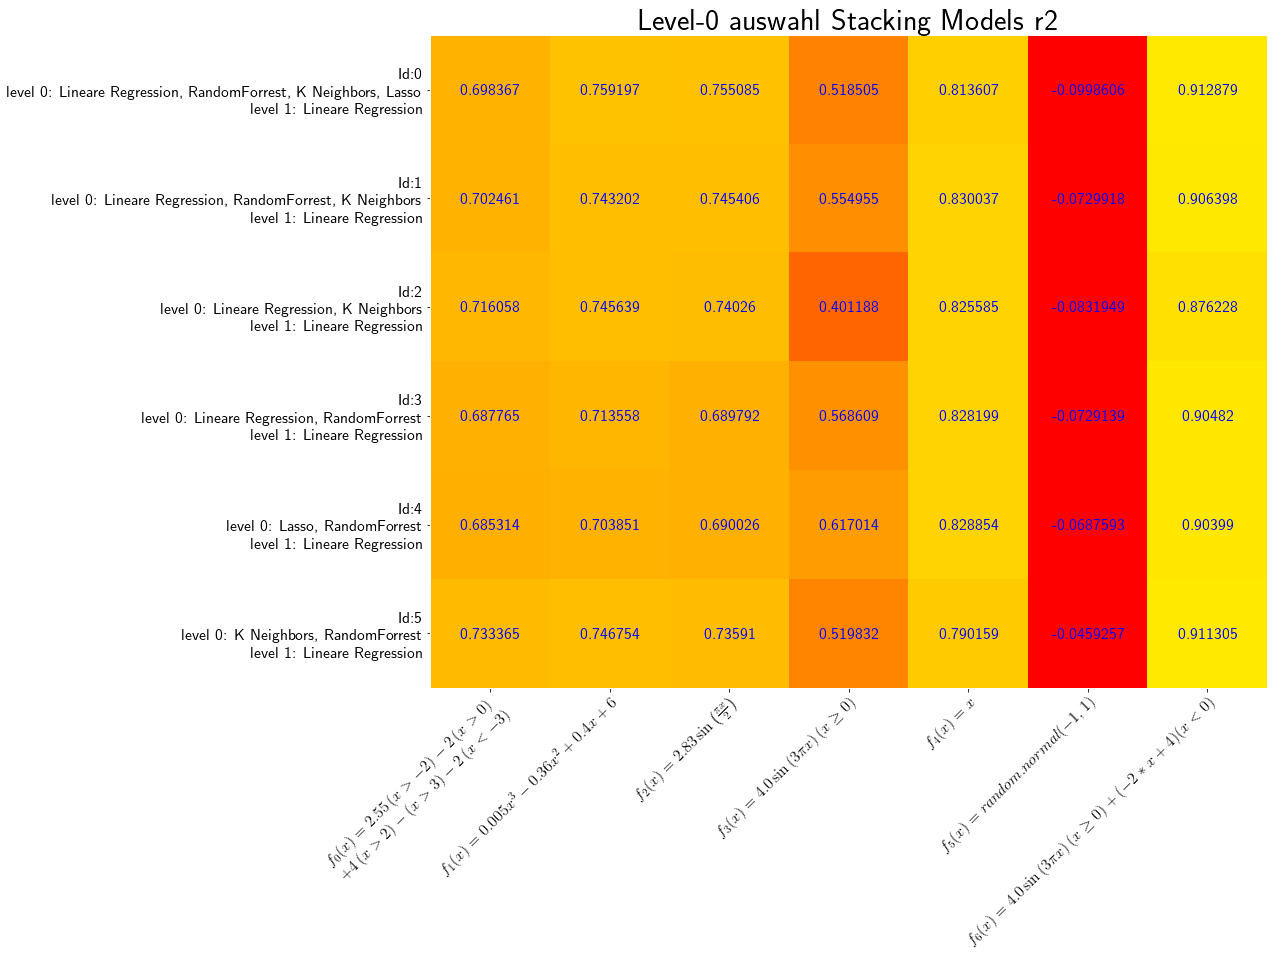

neg-rmse [[-1.18056606 -1.08322506 -1.06350576 -1.47066663 -1.05635568 -1.45423619
  -1.40486482]
 [-1.17449062 -1.08083669 -1.09740876 -1.44270863 -0.99161223 -1.43077495
  -1.45422391]
 [-1.15875171 -1.05095027 -1.12440867 -1.6515528  -1.01446405 -1.45731592
  -1.61811893]
 [-1.20791961 -1.14789354 -1.22407295 -1.43421587 -1.00507094 -1.45470188
  -1.47005479]
 [-1.23733745 -1.1949493  -1.21942802 -1.36286703 -0.99516385 -1.41441808
  -1.47763835]
 [-1.11572739 -1.11701925 -1.10533506 -1.44357066 -1.1063877  -1.41590161
  -1.40805425]]


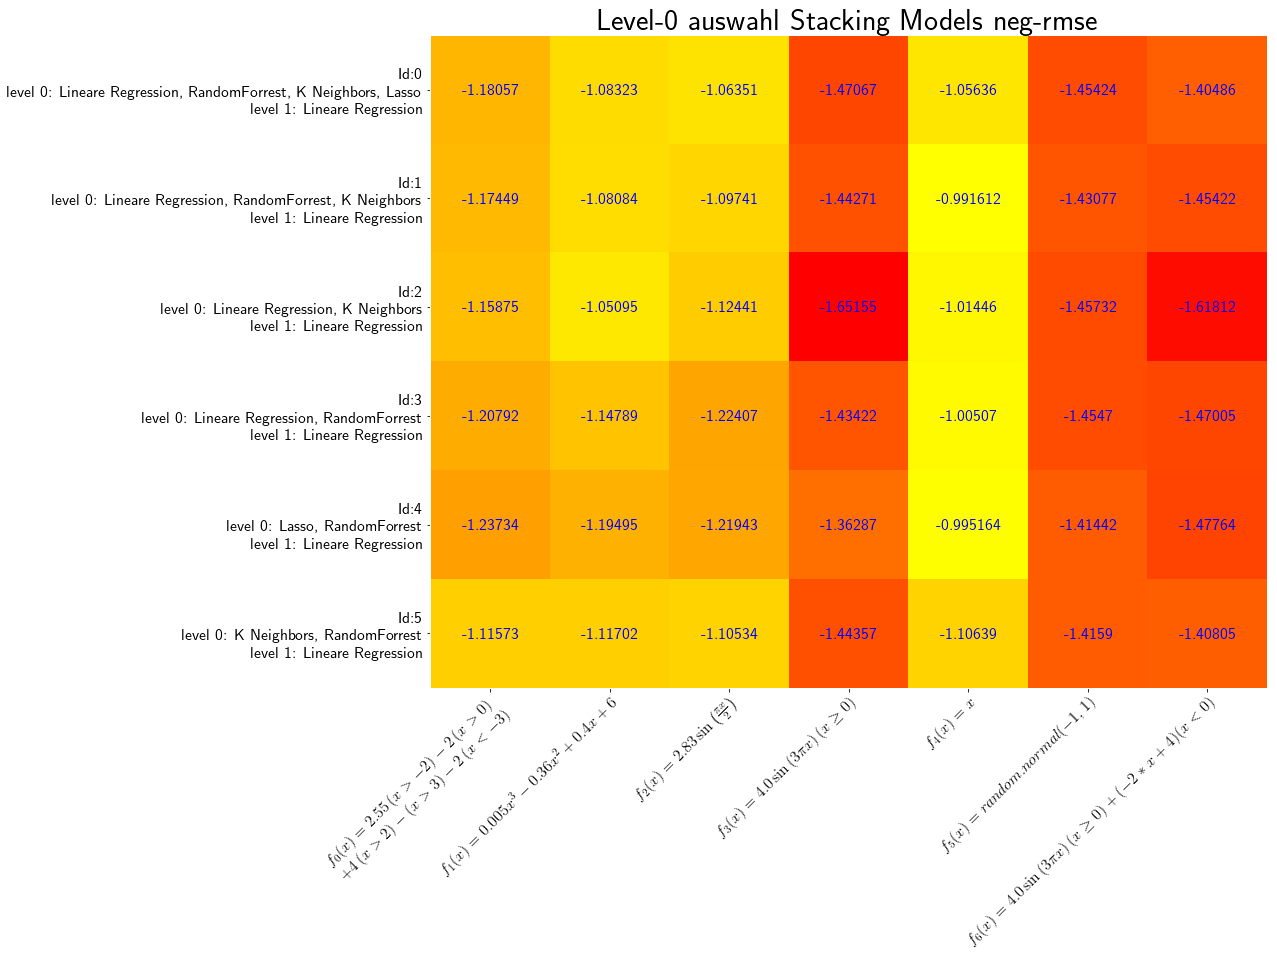

In [11]:
def score_rmse(y, y_pred, **kwargs):
    return np.sqrt(mean_squared_error(y, y_pred))

neg_rmse_score = make_scorer(score_rmse,greater_is_better=False)

scores = {"r2":'r2', "neg-rmse": neg_rmse_score}
scores_range = [(0,1),(None,None)]# r2 is from 1 to 0 and neg-rmse is from 0 to 2.7 to make the matrix more comparable to the one above

res = compare_models(stacking_model_list,function_list,scores,score_ranges=scores_range,title="Level-0 auswahl Stacking Models")

# Erstellen der Modelle für die Untersuchung der Level-1 Modellauswahl 

Bei gleichbleibender Level-0 Modelauswahl

In [12]:
level_0_modells=[linearReg,randomForrest,kNeighbors,lasso]
level_0_modell_description=f'level 0: Lineare Regression, RandomForrest, K Neighbors, Lasso\\\\ {two_newline}'


stacking_model_list =np.array( [
    
    (StackingModels(base_models=level_0_modells,
                    meta_model=linearReg,
                    n_folds=5),
     
     f'''\\raggedleft Id:0 {two_newline} 
     {level_0_modell_description}
     level 1: Lineare Regression'''),
    
    
    (StackingModels(base_models=level_0_modells,
                    meta_model=lasso,
                    n_folds=5),
     
     f'''\\raggedleft Id:1 {two_newline} 
     {level_0_modell_description}
     level 1: Lasso Regression'''),
    
    (StackingModels(base_models=level_0_modells,
                    meta_model=randomForrest,
                    n_folds=5),
     
     f'''\\raggedleft Id:2 {two_newline}
     {level_0_modell_description}
     level 1: RandomForrest'''),  
    
    
    (StackingModels(base_models=level_0_modells,
                    meta_model=KNeighborsRegressor(n_neighbors=2),
                    n_folds=5),
     
     f'''\\raggedleft Id:3 {two_newline}
     {level_0_modell_description}
     level 1: K Neighbors (n\_neighbors=2)'''),  
    
])

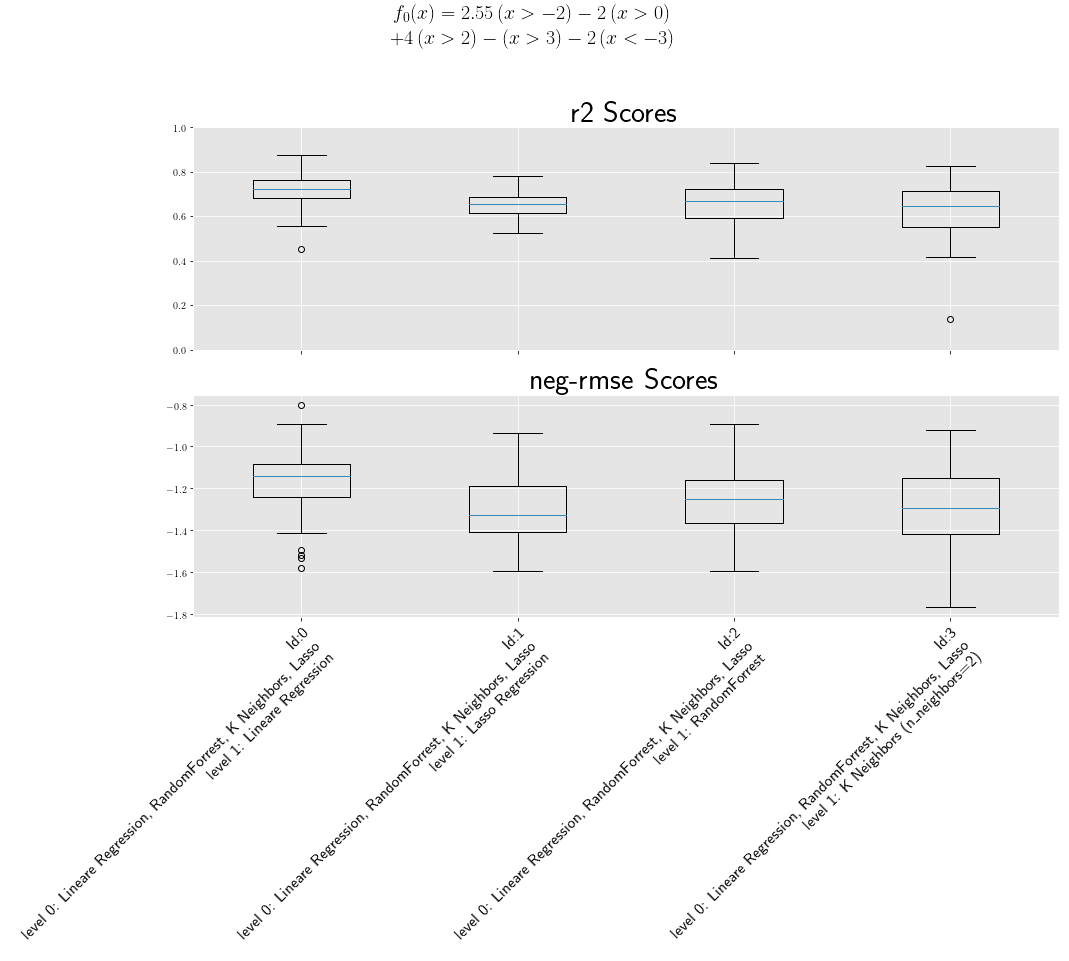

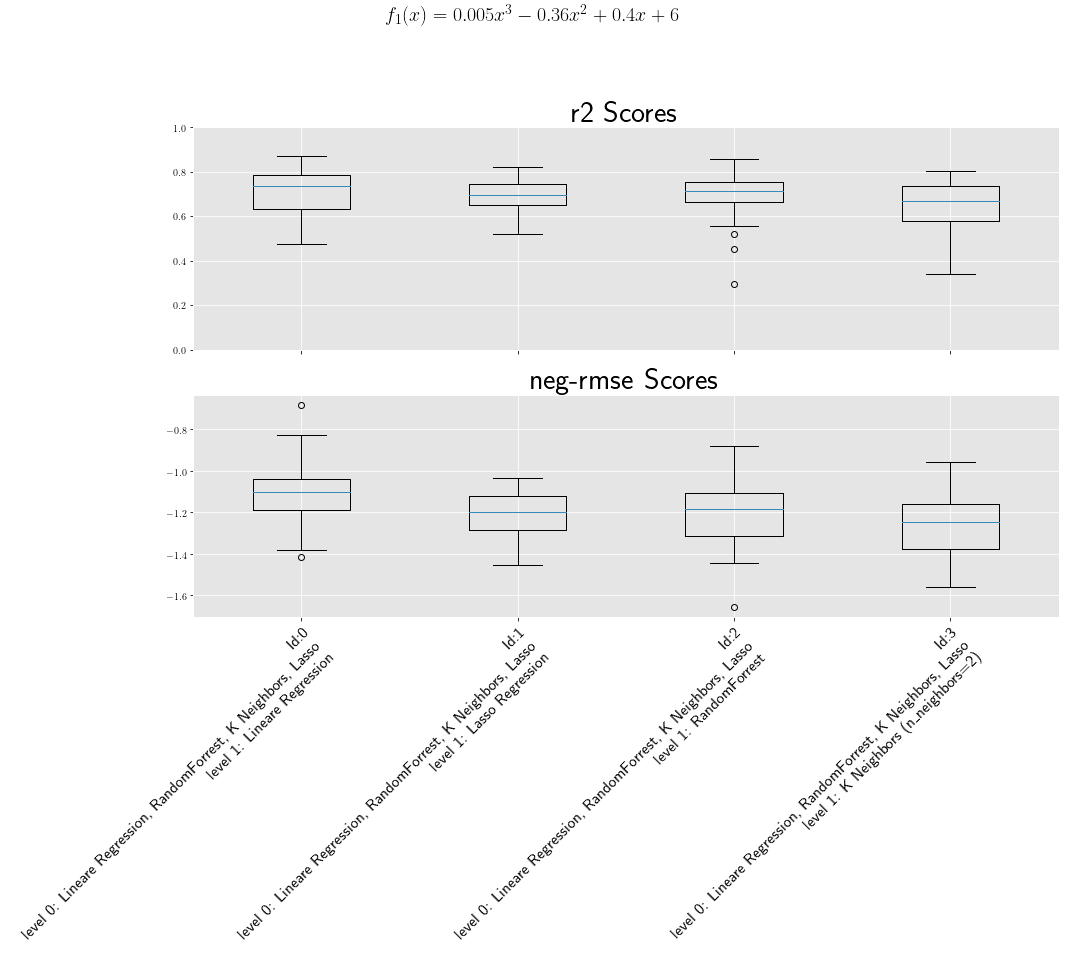

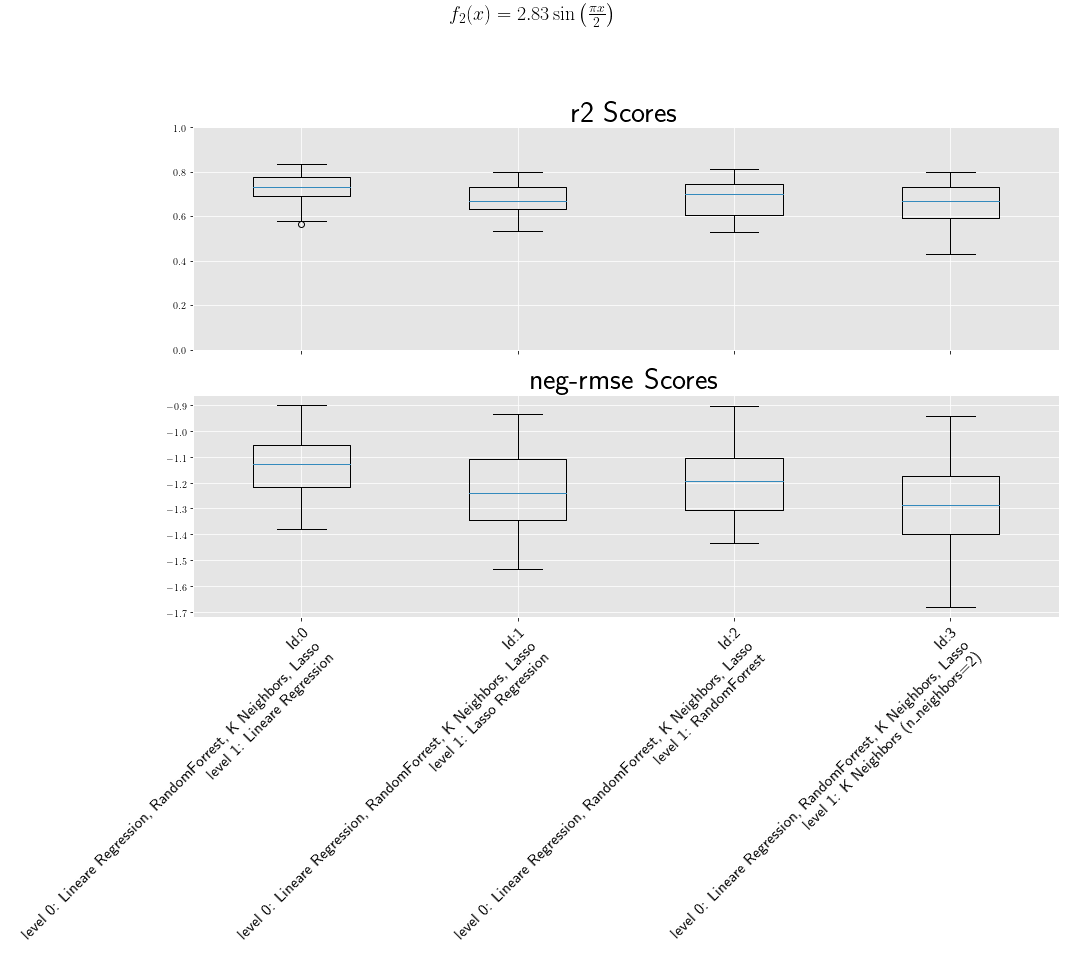

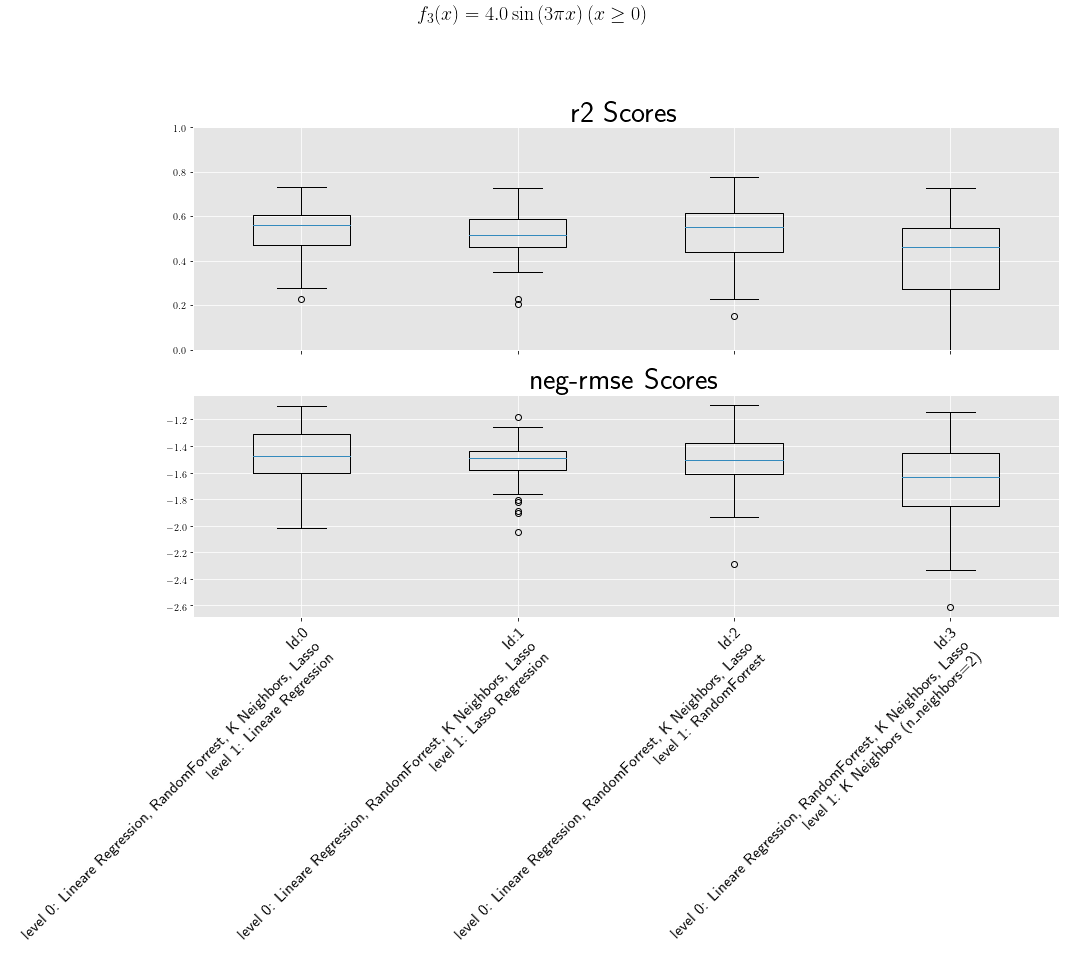

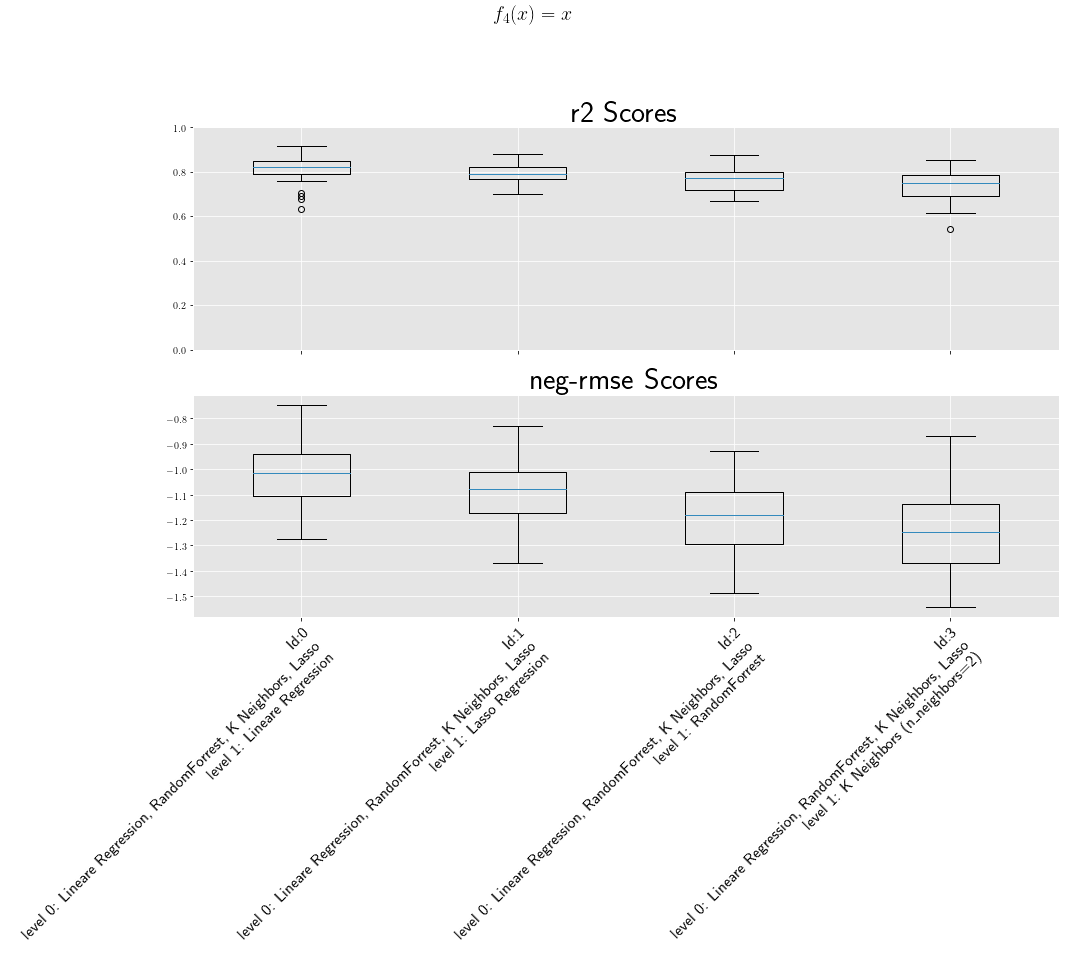

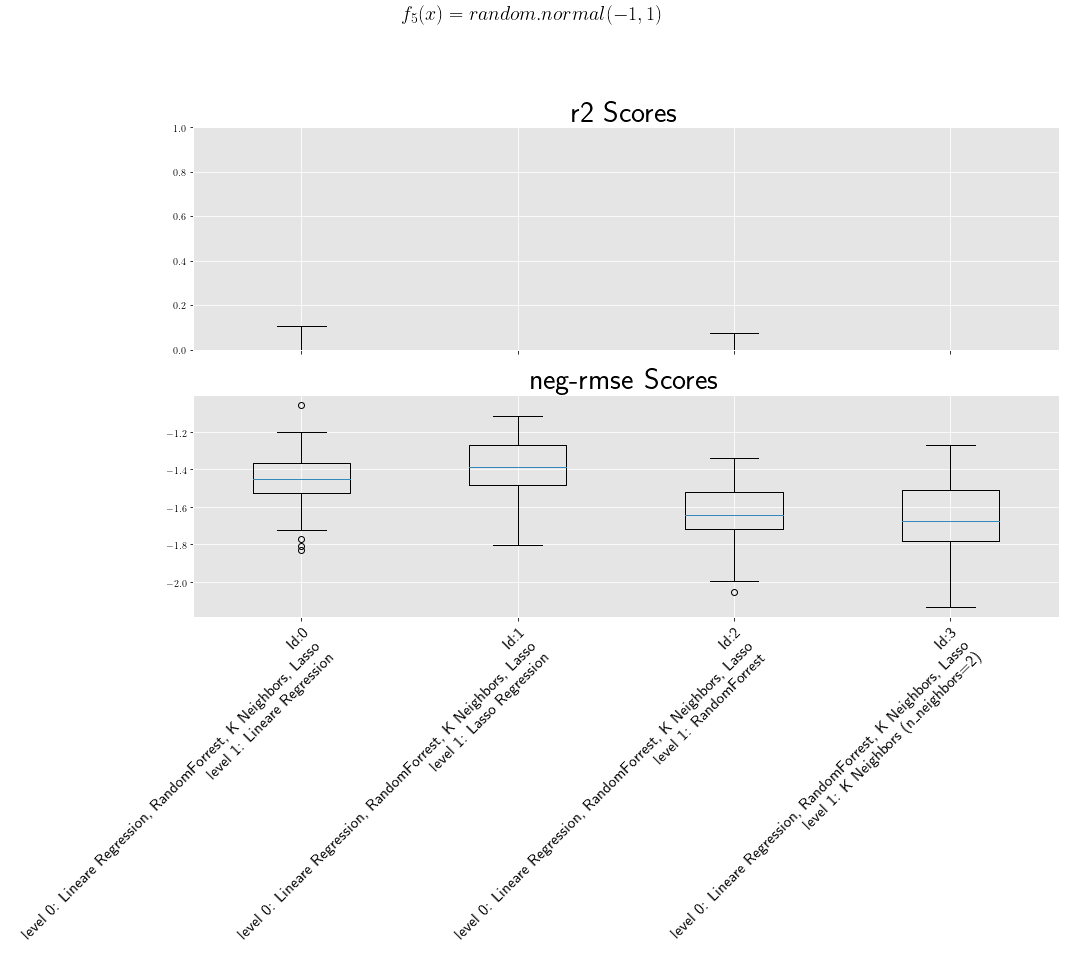

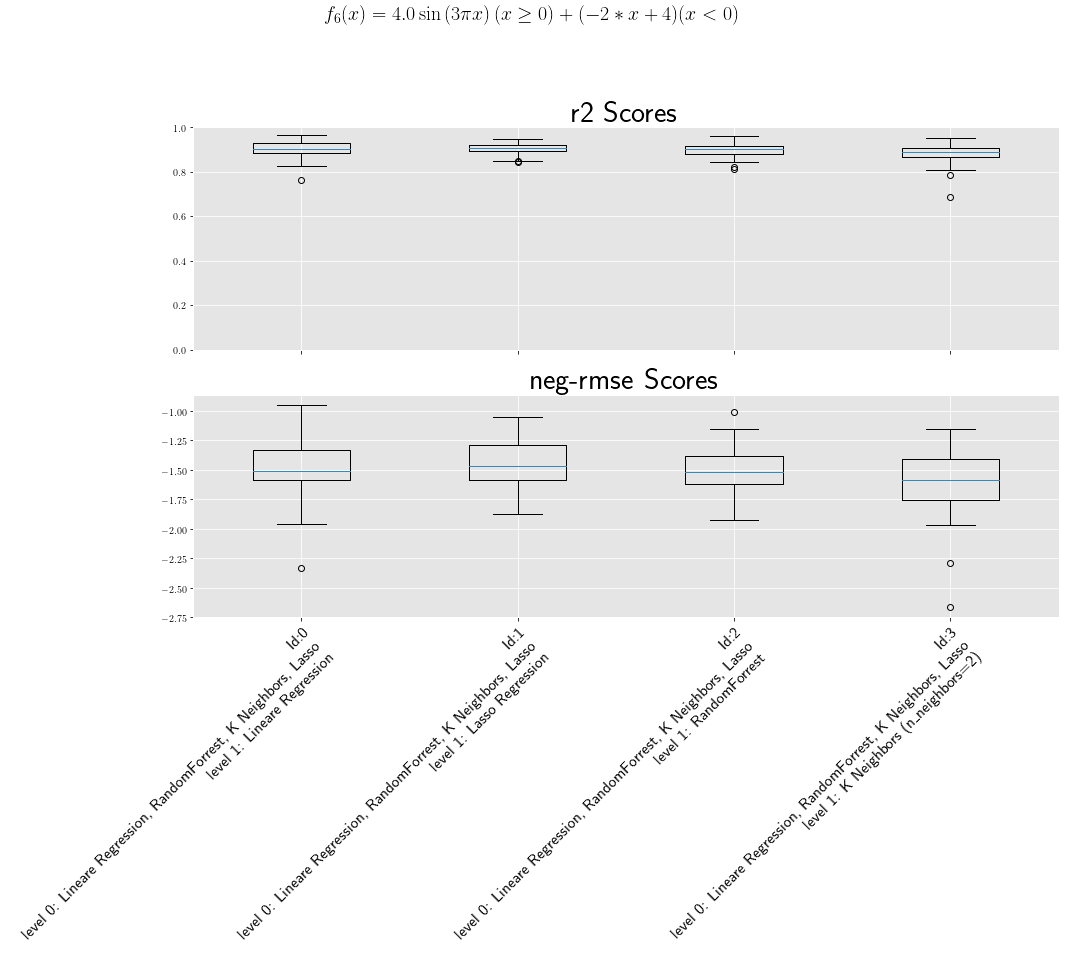

r2 [[ 0.71383868  0.71848656  0.72681347  0.5381086   0.81705529 -0.09986834
   0.90200511]
 [ 0.64980902  0.69532174  0.67458387  0.51469776  0.79473058 -0.0271808
   0.90485937]
 [ 0.65811907  0.69718426  0.68636427  0.50307845  0.76707909 -0.39744886
   0.89836463]
 [ 0.6354367   0.65112328  0.65746846  0.39121017  0.73933774 -0.53834762
   0.88321946]]


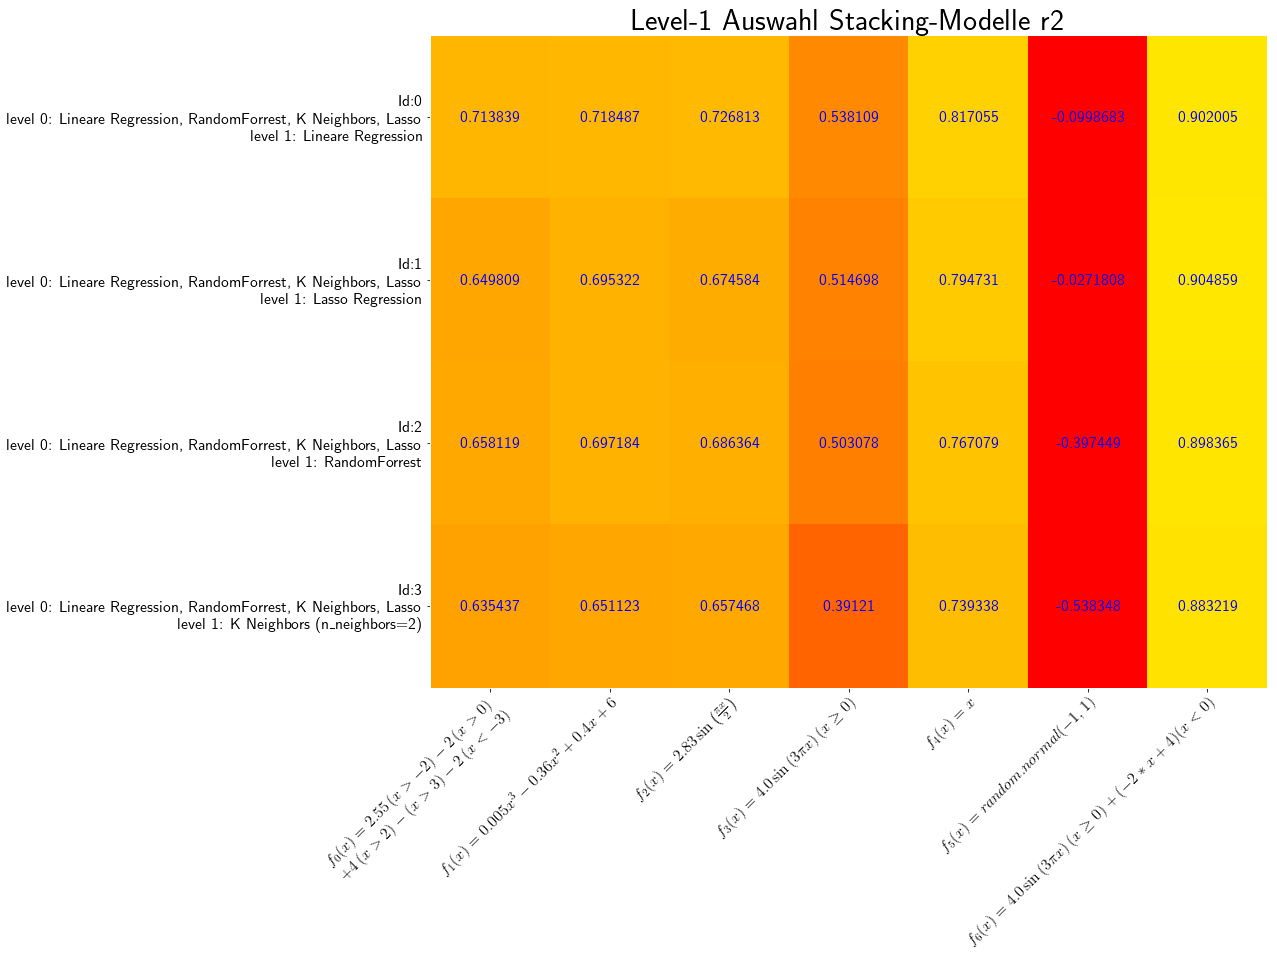

neg-rmse [[-1.16702415 -1.1030924  -1.13151537 -1.46634405 -1.02082389 -1.45973791
  -1.49034122]
 [-1.28996261 -1.21437504 -1.22475641 -1.51972221 -1.09003893 -1.38017796
  -1.46558047]
 [-1.27237152 -1.20439067 -1.20038158 -1.49985196 -1.17556199 -1.64946015
  -1.52073792]
 [-1.29347576 -1.2648182  -1.30214288 -1.65137432 -1.23914422 -1.66160259
  -1.60203002]]


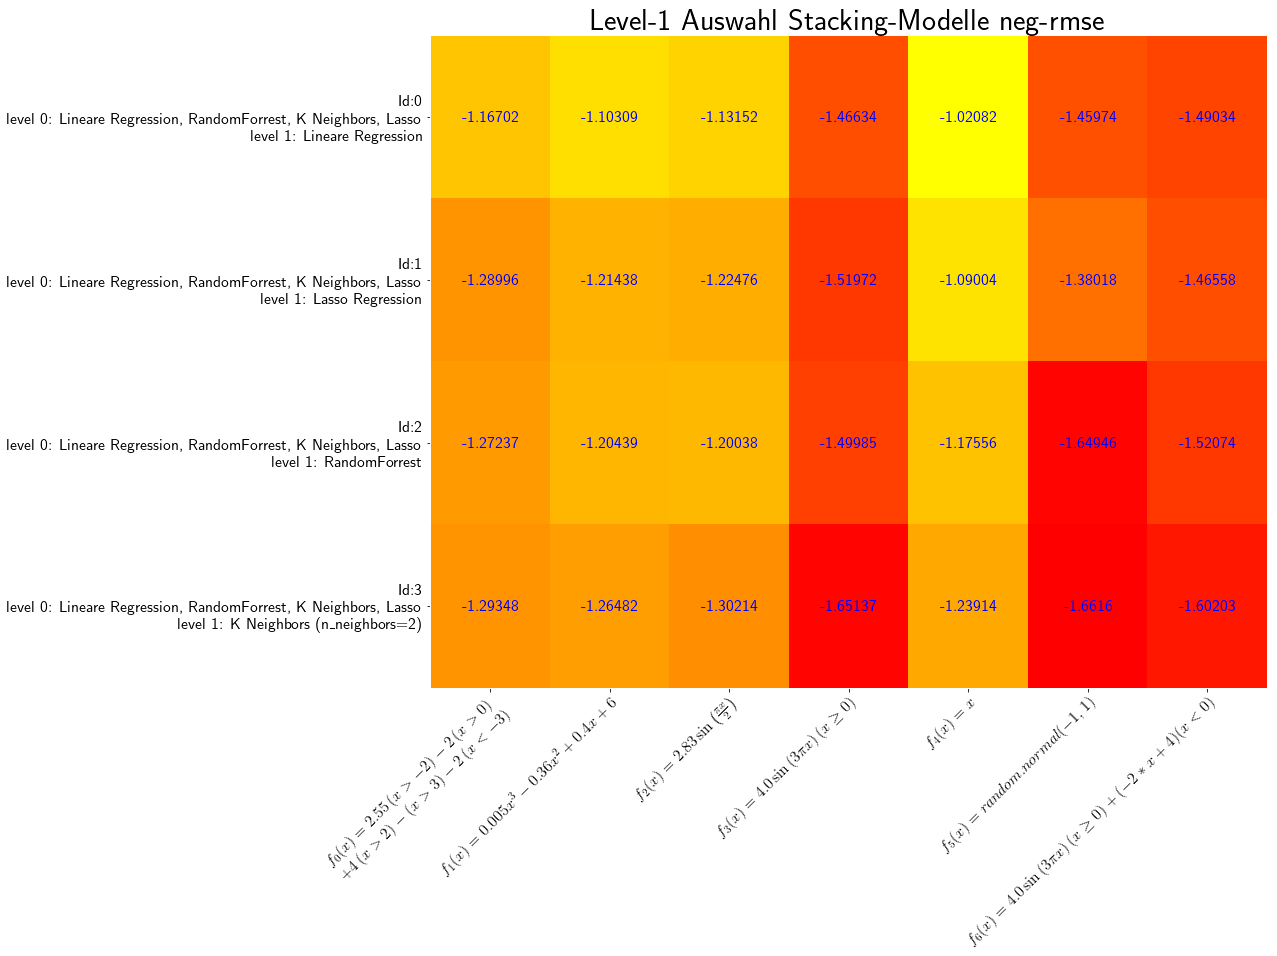

In [13]:
res = compare_models(stacking_model_list,function_list,scores,score_ranges=scores_range,title="Level-1 Auswahl  Stacking-Modelle")